## Car Evaluation Model using KNN



## Importing Libraries

In [1]:
import numpy
import pandas
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## load dataset

In [3]:
dataframe = pandas.read_csv(r"../DATASET/car_evaluation.csv")

## Assign names to Columns

In [4]:
dataframe.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']

## Encode Data

In [5]:
dataframe.buying.replace(
    ('vhigh','high','med','low'),
    (1,2,3,4), 
    inplace=True
)


dataframe.maint.replace(
    ('vhigh','high','med','low'),
    (1,2,3,4), 
    inplace=True
)


dataframe.doors.replace(
    ('2','3','4','5more'),
    (1,2,3,4), 
    inplace=True
)

dataframe.persons.replace(
    ('2','4','more'),
    (1,2,3), 
    inplace=True
)


dataframe.lug_boot.replace(
    ('small','med','big'),
    (1,2,3), 
    inplace=True
)


dataframe.safety.replace(
    ('low','med','high'),
    (1,2,3), 
    inplace=True
)


dataframe.classes.replace(
    ('unacc','acc','good','vgood'),
    (1,2,3,4), 
    inplace=True
)

## View first 5 records

In [6]:
print("dataframe.head: ", dataframe.head())

dataframe.head:     buying  maint  doors  persons  lug_boot  safety  classes
0       1      1      1        1         1       2        1
1       1      1      1        1         1       3        1
2       1      1      1        1         2       1        1
3       1      1      1        1         2       2        1
4       1      1      1        1         2       3        1


## Description

In [7]:
print("dataframe.describe: ", dataframe.describe())

dataframe.describe:              buying        maint        doors      persons     lug_boot  \
count  1727.000000  1727.000000  1727.000000  1727.000000  1727.000000   
mean      2.500869     2.500869     2.500869     2.000579     2.000579   
std       1.118098     1.118098     1.118098     0.816615     0.816615   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     1.000000     1.000000   
50%       3.000000     3.000000     3.000000     2.000000     2.000000   
75%       3.500000     3.500000     3.500000     3.000000     3.000000   
max       4.000000     4.000000     4.000000     3.000000     3.000000   

            safety      classes  
count  1727.000000  1727.000000  
mean      2.000579     1.415171  
std       0.816615     0.740847  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       2.000000     1.000000  
75%       3.000000     2.000000  
max       3.000000     4.000000  


## Plotting Histogram

(array([1209.,    0.,    0.,  384.,    0.,    0.,   69.,    0.,    0.,
          65.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

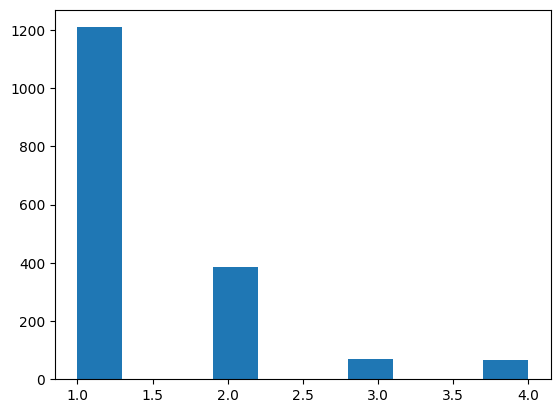

In [8]:
plt.hist((dataframe.classes))

array([[<AxesSubplot:title={'center':'buying'}>,
        <AxesSubplot:title={'center':'maint'}>,
        <AxesSubplot:title={'center':'doors'}>],
       [<AxesSubplot:title={'center':'persons'}>,
        <AxesSubplot:title={'center':'lug_boot'}>,
        <AxesSubplot:title={'center':'safety'}>],
       [<AxesSubplot:title={'center':'classes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

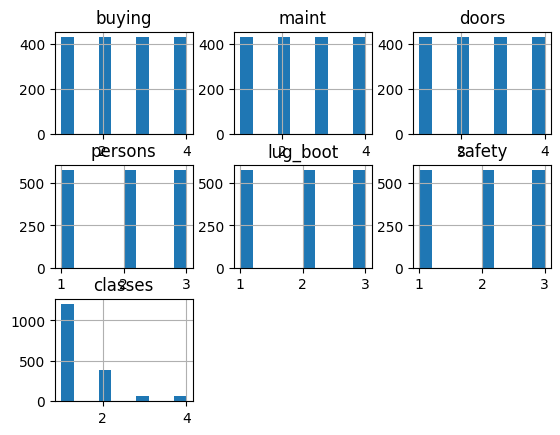

In [9]:
dataframe.hist()

## Training

In [10]:
max_accuracy = 0
min_accuracy = 200

loops = 30

knn = 0

predictions = []

for i in range(loops):
    
    dataset = dataframe.values


    X = dataset[:,0:6]
    Y = numpy.asarray(dataset[:,6], dtype="S6")


    # Split Data to Train and Test
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)
    
    # create model
    knn = KNeighborsClassifier()

    knn.fit(X_Train, Y_Train)

    predictions = knn.predict(X_Test)

    score = accuracy_score(Y_Test, predictions)
    
    max_accuracy = max(max_accuracy, score)
    min_accuracy = min(min_accuracy, score)
    
    print(score)

0.9393063583815029
0.9161849710982659
0.9277456647398844
0.8988439306358381
0.9161849710982659
0.9132947976878613
0.9190751445086706
0.9219653179190751
0.9335260115606936
0.9595375722543352
0.9393063583815029
0.9190751445086706
0.9364161849710982
0.9277456647398844
0.9393063583815029
0.9248554913294798
0.9450867052023122
0.9132947976878613
0.9161849710982659
0.9335260115606936
0.9132947976878613
0.9161849710982659
0.9219653179190751
0.9364161849710982
0.9190751445086706
0.9219653179190751
0.8988439306358381
0.9248554913294798
0.9393063583815029
0.9277456647398844


In [11]:
print("max_accuracy : ", max_accuracy)
print("min_accuracy : ", min_accuracy)

max_accuracy :  0.9595375722543352
min_accuracy :  0.8988439306358381


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[242   0   1   0]
 [ 10  67   4   0]
 [  2   1   4   0]
 [  0   4   3   8]]


## Plot the confusion matrix.

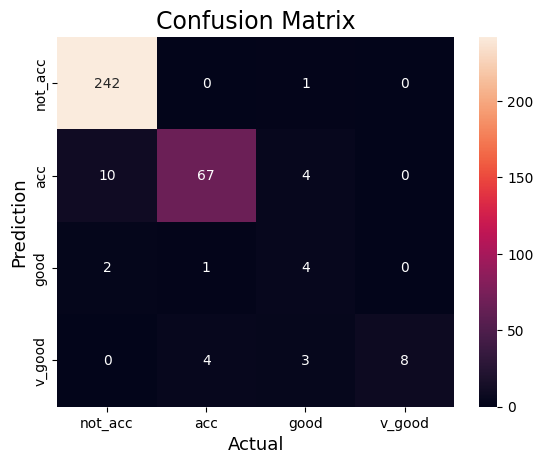

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['not_acc','acc', 'good', 'v_good'],
            yticklabels=['not_acc','acc', 'good', 'v_good'])


plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, predictions))

              precision    recall  f1-score   support

        b'1'       0.95      1.00      0.97       243
        b'2'       0.93      0.83      0.88        81
        b'3'       0.33      0.57      0.42         7
        b'4'       1.00      0.53      0.70        15

    accuracy                           0.93       346
   macro avg       0.80      0.73      0.74       346
weighted avg       0.94      0.93      0.93       346



## Predictions

In [20]:
buying = 4
maint = 4
doors = 4
persons = 3
lug_boot = 2
safety = 2

knn.predict([[buying, maint, doors, persons, lug_boot, safety]])

array([b'3'], dtype='|S6')

## Saving the model

In [15]:
import pickle

with open('model_pickle','wb') as file:
    pickle.dump(knn,file)